In [1]:
import os
import cv2
import tqdm
import pickle
import numpy as np
import pandas as pd
from ultralytics import YOLO
import matplotlib.pyplot as plt
from utils.dataset_utils import *
from collections import defaultdict
from deep_sort_realtime.deepsort_tracker import DeepSort

In [2]:
raw_video_folder = r'..\data\raw\pred_prey_interaction'
yolo_path = r'..\models\costumized_yolo\costumized_yolo\costumized_yolo.pt'
processed_video_folder = r'..\data\processed\pred_prey_interactions'

In [ ]:
# 7 Stunden
model = YOLO(yolo_path)

all_stats = []

for video in os.listdir(raw_video_folder):

    print(f"\nProcessing {video}...")

    video_path = os.path.join(raw_video_folder, video)
    cap = cv2.VideoCapture(video_path)
    total_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for frame_idx in tqdm.tqdm(range(total_frame_count), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break

        result = model(frame, verbose=False)[0]
        boxes = result.boxes

        if boxes is None:
            total_detections = prey_detections = pred_head_detections = 0
        else:
            cls = boxes.cls.cpu().numpy().astype(int)
            total_detections = len(cls)
            prey_detections = (cls == 2).sum()
            pred_head_detections = (cls == 1).sum()

        all_stats.append({
            "video": video,
            "frame": frame_idx,
            "total": prey_detections + pred_head_detections,
            "prey": prey_detections,
            "pred_head": pred_head_detections
        })

    cap.release()

df = pd.DataFrame(all_stats)


Processing pred_prey_interaction_0.07.mp4...


Processing frames: 100%|██████████| 210/210 [00:29<00:00,  7.18it/s]



Processing pred_prey_interaction_0.14.mp4...


Processing frames: 100%|██████████| 424/424 [00:56<00:00,  7.44it/s]



Processing pred_prey_interaction_0.15.mp4...


Processing frames: 100%|██████████| 489/489 [01:02<00:00,  7.86it/s]



Processing pred_prey_interaction_0.16.mp4...


Processing frames: 100%|██████████| 499/499 [01:03<00:00,  7.82it/s]



Processing pred_prey_interaction_0.17.mp4...


Processing frames: 100%|██████████| 534/534 [01:07<00:00,  7.87it/s]



Processing pred_prey_interaction_0.24.mp4...


Processing frames: 100%|██████████| 735/735 [01:34<00:00,  7.81it/s]



Processing pred_prey_interaction_0.27.mp4...


Processing frames: 100%|██████████| 813/813 [01:43<00:00,  7.88it/s]



Processing pred_prey_interaction_0.36.mp4...


Processing frames: 100%|██████████| 1099/1099 [02:23<00:00,  7.67it/s]



Processing pred_prey_interaction_0.41.mp4...


Processing frames: 100%|██████████| 1239/1239 [02:37<00:00,  7.87it/s]



Processing pred_prey_interaction_1.01.mp4...


Processing frames: 100%|██████████| 1837/1837 [03:55<00:00,  7.80it/s]



Processing pred_prey_interaction_1.07.mp4...


Processing frames: 100%|██████████| 2014/2014 [04:20<00:00,  7.74it/s]



Processing pred_prey_interaction_1.09.mp4...


Processing frames: 100%|██████████| 2097/2097 [04:32<00:00,  7.70it/s]



Processing pred_prey_interaction_1.11.mp4...


Processing frames: 100%|██████████| 2139/2139 [04:29<00:00,  7.93it/s]



Processing pred_prey_interaction_1.20.mp4...


Processing frames: 100%|██████████| 2412/2412 [05:05<00:00,  7.88it/s]



Processing pred_prey_interaction_1.28.mp4...


Processing frames: 100%|██████████| 2661/2661 [05:35<00:00,  7.94it/s]



Processing pred_prey_interaction_1.30.mp4...


Processing frames: 100%|██████████| 2718/2718 [05:44<00:00,  7.89it/s]



Processing pred_prey_interaction_1.50.mp4...


Processing frames: 100%|██████████| 3310/3310 [06:59<00:00,  7.90it/s]



Processing pred_prey_interaction_1.52.mp4...


Processing frames: 100%|██████████| 3376/3376 [08:22<00:00,  6.72it/s]



Processing pred_prey_interaction_1.53.mp4...


Processing frames: 100%|██████████| 3369/3369 [08:21<00:00,  6.72it/s]



Processing pred_prey_interaction_1.54.mp4...


Processing frames: 100%|██████████| 3393/3393 [08:23<00:00,  6.74it/s]



Processing pred_prey_interaction_16.02.mp4...


Processing frames: 100%|██████████| 28960/28960 [1:11:38<00:00,  6.74it/s]



Processing pred_prey_interaction_2.33.mp4...


Processing frames: 100%|██████████| 4593/4593 [11:21<00:00,  6.74it/s]



Processing pred_prey_interaction_2.49.mp4...


Processing frames: 100%|██████████| 5086/5086 [12:32<00:00,  6.76it/s]



Processing pred_prey_interaction_2.56.mp4...


Processing frames: 100%|██████████| 5296/5296 [13:04<00:00,  6.75it/s]



Processing pred_prey_interaction_2.59.mp4...


Processing frames: 100%|██████████| 5397/5397 [13:30<00:00,  6.66it/s]



Processing pred_prey_interaction_3.00.mp4...


Processing frames: 100%|██████████| 5410/5410 [13:24<00:00,  6.73it/s]



Processing pred_prey_interaction_3.03.mp4...


Processing frames: 100%|██████████| 5499/5499 [13:39<00:00,  6.71it/s]



Processing pred_prey_interaction_3.11.mp4...


Processing frames: 100%|██████████| 5745/5745 [14:14<00:00,  6.72it/s]



Processing pred_prey_interaction_3.31.mp4...


Processing frames: 100%|██████████| 6333/6333 [15:43<00:00,  6.72it/s]



Processing pred_prey_interaction_3.33.mp4...


Processing frames: 100%|██████████| 6412/6412 [15:49<00:00,  6.75it/s]



Processing pred_prey_interaction_3.35.mp4...


Processing frames: 100%|██████████| 6466/6466 [15:55<00:00,  6.77it/s]



Processing pred_prey_interaction_3.59.mp4...


Processing frames: 100%|██████████| 7182/7182 [17:37<00:00,  6.79it/s]



Processing pred_prey_interaction_4.17.mp4...


Processing frames: 100%|██████████| 7732/7732 [18:57<00:00,  6.80it/s]



Processing pred_prey_interaction_4.29.mp4...


Processing frames: 100%|██████████| 8089/8089 [19:50<00:00,  6.79it/s]



Processing pred_prey_interaction_4.30.mp4...


Processing frames: 100%|██████████| 8127/8127 [19:56<00:00,  6.79it/s]


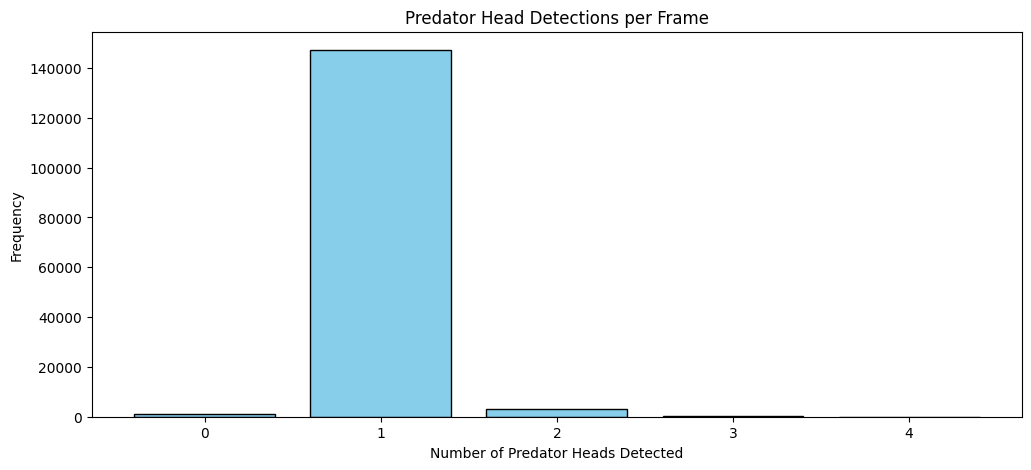

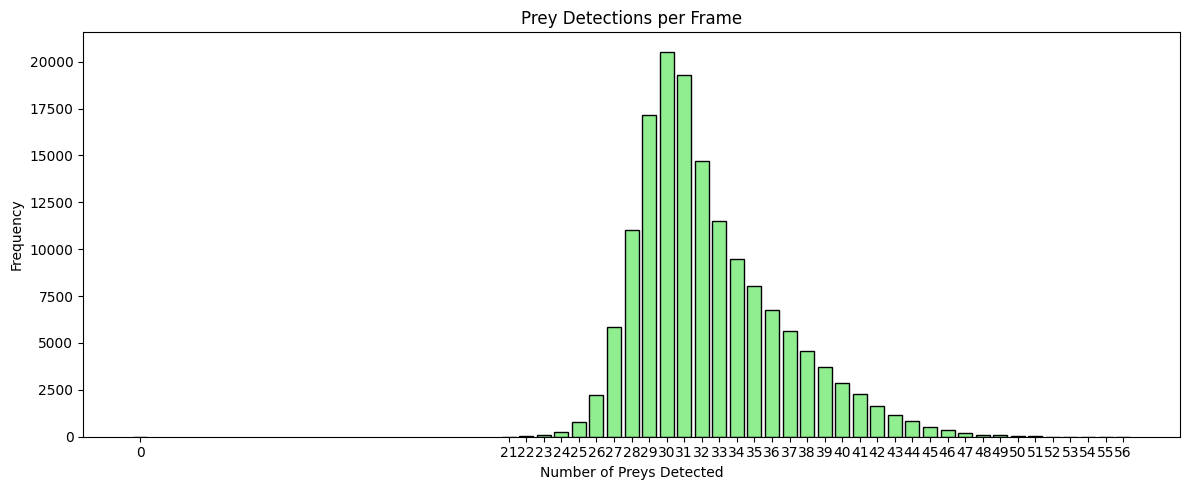

Predator Values: pred_head
0      1251
1    147176
2      3166
3        98
4         4
Name: count, dtype: int64
Prey Values: prey
0         1
21        1
22       17
23       66
24      262
25      766
26     2203
27     5824
28    11021
29    17157
30    20535
31    19265
32    14727
33    11511
34     9492
35     8039
36     6780
37     5614
38     4547
39     3718
40     2853
41     2263
42     1661
43     1163
44      824
45      534
46      339
47      212
48      115
49       78
50       57
51       24
52       10
53        9
54        5
55        1
56        1
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(12,5))
pred_counts = df["pred_head"].value_counts().sort_index()
plt.bar(pred_counts.index, pred_counts.values, color="skyblue", edgecolor="black")
plt.title("Predator Head Detections per Frame")
plt.xlabel("Number of Predator Heads Detected")
plt.ylabel("Frequency")
plt.xticks(pred_counts.index)

plt.figure(figsize=(12,5))
prey_counts = df["prey"].value_counts().sort_index()
plt.bar(prey_counts.index, prey_counts.values, color="lightgreen", edgecolor="black")
plt.title("Prey Detections per Frame")
plt.xlabel("Number of Preys Detected")
plt.ylabel("Frequency")
plt.xticks(prey_counts.index)

plt.tight_layout()
plt.show()

print("Predator Values:", df["pred_head"].value_counts().sort_index())
print("Prey Values:", df["prey"].value_counts().sort_index())

In [5]:
true_pred = 1
true_prey = 32

# Mean absolute error
mae_pred = np.mean(np.abs(df["pred_head"] - true_pred))
mae_prey = np.mean(np.abs(df["prey"] - true_prey))

print(f"MAE Predator Head: {mae_pred:.2f}")
print(f"MAE Prey: {mae_prey:.2f}")

MAE Predator Head: 0.03
MAE Prey: 3.11


In [6]:
'''model = YOLO(yolo_path)

for video in os.listdir(raw_video_folder):

    print(f"\nProcessing {video}...")

    video_path = os.path.join(raw_video_folder, video)
    cap = cv2.VideoCapture(video_path)
    total_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for frame_idx in tqdm.tqdm(range(total_frame_count), desc="Processing frames"):
        ret, frame = cap.read()
        if not ret:
            break

        result = model(frame, verbose=False)[0]
        boxes = result.boxes

        if boxes is None or len(boxes) == 0:
            total_detections = prey_detections = pred_head_detections = 0
        else:
            cls = boxes.cls.cpu().numpy().astype(int)
            total_detections = len(cls)
            prey_detections = (cls == 2).sum()
            pred_head_detections = ((cls == 1) | (cls == 0)).sum()  # Predator + Predator Head

            # Bounding Boxes und Labels zeichnen
            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                cls_id = int(box.cls.cpu().numpy())
                conf = float(box.conf.cpu().numpy())

                if cls_id in [0, 1]:  # Predator + Predator Head
                    color = (0, 0, 255)  # rot
                    label = f"Pred {conf:.2f}"
                elif cls_id == 2:  # Prey
                    color = (0, 255, 0)  # grün
                    label = f"Prey {conf:.2f}"
                else:
                    color = (255, 255, 0)
                    label = f"Cls{cls_id} {conf:.2f}"

                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                cv2.putText(frame, label, (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

        # Frame anzeigen
        cv2.imshow("Detections", frame)

        # Mit 'q' abbrechen
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()

cv2.destroyAllWindows()'''

'model = YOLO(yolo_path)\n\nfor video in os.listdir(raw_video_folder):\n\n    print(f"\nProcessing {video}...")\n\n    video_path = os.path.join(raw_video_folder, video)\n    cap = cv2.VideoCapture(video_path)\n    total_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))\n\n    for frame_idx in tqdm.tqdm(range(total_frame_count), desc="Processing frames"):\n        ret, frame = cap.read()\n        if not ret:\n            break\n\n        result = model(frame, verbose=False)[0]\n        boxes = result.boxes\n\n        if boxes is None or len(boxes) == 0:\n            total_detections = prey_detections = pred_head_detections = 0\n        else:\n            cls = boxes.cls.cpu().numpy().astype(int)\n            total_detections = len(cls)\n            prey_detections = (cls == 2).sum()\n            pred_head_detections = ((cls == 1) | (cls == 0)).sum()  # Predator + Predator Head\n\n            # Bounding Boxes und Labels zeichnen\n            for box in boxes:\n                x1, y1,